# Tutorial : profiling a binary target

## Basics

To get started, we we load the ``adult`` dataset as a ``pandas.DataFrame`` object.

In [1]:
import pandas as pd
from targeter.utils import load_adult_data 
adult = load_adult_data()  # function defined in this package


(CVXPY) Sep 16 11:22:49 AM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.7.2996). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Sep 16 11:22:49 AM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.7.2996). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')


In [2]:
adult.head()

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATIONNUM,MARITALSTATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITALGAIN,CAPITALLOSS,HOURSPERWEEK,NATIVECOUNTRY,ABOVE50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


Then we chose one variable of interest (the "target"). This variable could be binary or continuous/numeric.

In [3]:
target = "ABOVE50K"

Then we will import and call the package main function ``Targeter``. Note that for this first run, providing as parameters the data and thge target is sufficient.

In [4]:
from targeter import Targeter

In [5]:
tar = Targeter(adult, target=target)

the reference level has been defined as:1


You may have noticed that the target has been detected as boolean and with specific value 1 selected as a reference (this will be used in plots). Let's see what this ``tar`` output object is:

In [6]:
tar

Well, not so relevant... But as an object of class ``Targeter``, it has several methods and slots available. Lets call a first one of them:

In [7]:
tar.variable_names

['EDUCATIONNUM',
 'FNLWGT',
 'RELATIONSHIP',
 'WORKCLASS',
 'AGE',
 'EDUCATION',
 'OCCUPATION',
 'RACE',
 'CAPITALGAIN',
 'SEX',
 'HOURSPERWEEK',
 'MARITALSTATUS',
 'CAPITALLOSS']

So you have here the remaining variables of the ``adult`` dataset. All those variables have been crossed with the target by using ``OptBinning`` package.
THe ouput object resulting from the call to ``OptBinning.BinningProcess`` have been stored in a slot called ``profiles``:

In [8]:
tar.profiles

BinningProcess(variable_names=['EDUCATIONNUM', 'FNLWGT', 'RELATIONSHIP',
                               'WORKCLASS', 'AGE', 'EDUCATION', 'OCCUPATION',
                               'RACE', 'CAPITALGAIN', 'SEX', 'HOURSPERWEEK',
                               'MARITALSTATUS', 'CAPITALLOSS'])

That means that you can when  you want have access to all metthods available in ``OptBinning`` package.

To make your life easier, we have wrapped the most useful methods and put them available directly in the ``Targeter`` object.

For instance, you can retrieve a binning table via:

In [9]:
tar.get_table('SEX')

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[ Female],10771,0.330795,9592,1179,0.109461,0.948017,0.225308,0.027154
1,[ Male],21790,0.669205,15128,6662,0.305737,-0.328119,0.077981,0.009704
2,Special,0,0.000000,0,0,0.000000,0.000000,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.000000,0.000000,0.000000


You will recognize directly a table resulting of a ``build_table`` call in ``OptBinning``. 
Hence from its documentation, here is the content of this table.

- Bin: the intervals delimited by the optimal split points.,
- Count: the number of records for each bin.,
- Count (%): the percentage of records for each bin.,
- Non-event: the number of non-event records $(y = 0)$ for each bin.,
- Event: the number of event records $(y = 1)$ for each bin.,
- Event rate: the percentage of event records for each bin.,
- WoE: the Weight-of-Evidence for each bin.,
- IV: the Information Value (also known as Jeffrey's divergence) for each bin.,
- JS: the Jensen-Shannon divergence for each bin.,

Note that by default, we removed the Total row that you might have back using `Total` parameter

In [10]:
tar.get_table('SEX', add_totals = True)

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[ Female],10771,0.330795,9592,1179,0.109461,0.948017,0.225308,0.027154
1,[ Male],21790,0.669205,15128,6662,0.305737,-0.328119,0.077981,0.009704
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,32561,1.000000,24720,7841,0.240810,,0.303289,0.036858


``ÒptBinning`` package's focus is clearly on Credit Risk. Here we just ujse binning approach as a convenient way to explore relations of variables with a variable of interest, whatever the business context and objectives are. Think about it as a pre-modelling appaorach. We also have the nice ``plot`` method coming from ``ÒptBinning``. 

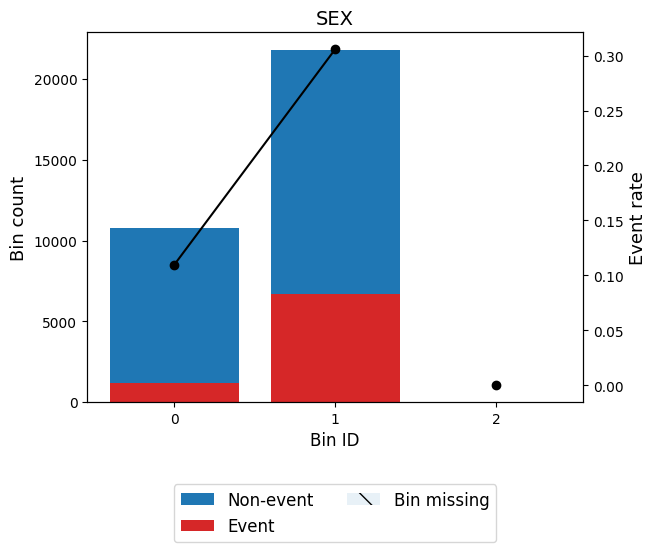

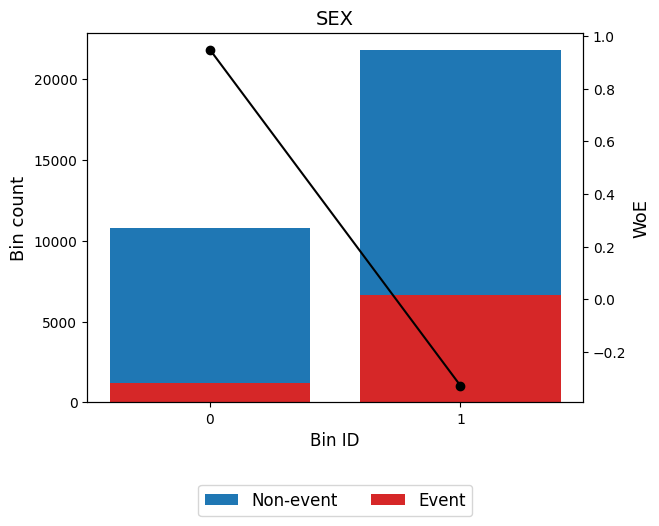

In [15]:
tar.plot(name = "SEX", add_missing=True ,add_special=False, show_bin_labels=False)


tar.get_optbinning_object("SEX").binning_table.plot( add_missing=False, add_special=False)

In [12]:
tar.summary()

,name,dtype,status,selected,n_bins,iv,js,gini,quality_score,Max ER - Bin,Max Event Rate,Max ER - Count,Selected
10,HOURSPERWEEK,numerical,OPTIMAL,True,7,0.468022,0.055382,0.349637,0.717161,"[49.50, 55.50)",0.447721,3730,x
9,SEX,categorical,OPTIMAL,True,2,0.303289,0.036858,0.237662,0.556085,[' Male'],0.305737,21790,x
5,EDUCATION,categorical,OPTIMAL,True,7,0.724232,0.083571,0.432671,0.502416,[' Masters' ' Prof-school' ' Doctorate'],0.622419,2712,x
0,EDUCATIONNUM,numerical,OPTIMAL,True,7,0.722082,0.083426,0.432444,0.400851,"[13.50, inf)",0.622419,2712,x
6,OCCUPATION,categorical,OPTIMAL,True,8,0.749516,0.087156,0.455559,0.32385,[' Exec-managerial'],0.484014,4066,x
3,WORKCLASS,categorical,OPTIMAL,True,5,0.152814,0.018384,0.165456,0.254219,[' Federal-gov' ' Self-emp-inc'],0.478324,2076,x
8,CAPITALGAIN,numerical,OPTIMAL,True,2,0.668747,0.059895,0.188124,0.088124,"[4668.50, inf)",0.899941,1699,x
7,RACE,categorical,OPTIMAL,True,2,0.068563,0.008351,0.074661,0.075685,[' White' ' Asian-Pac-Islander'],0.256212,28855,x
4,AGE,numerical,OPTIMAL,True,14,1.207969,0.101723,0.425356,0.016125,"[49.50, 54.50)",0.413861,2554,x
11,MARITALSTATUS,categorical,OPTIMAL,True,3,1.334507,0.153198,0.537431,0.014769,[' Married-AF-spouse' ' Married-civ-spouse'],0.446830,14999,x
